In [1]:
# Input data
import numpy as np
from utilities import *

# test and train read
X_train_valid, Y_train_valid, list_ch_train_valid = read_data(data_path="../../datasets/har/har-data/", split="train")
X_test, Y_test, list_ch_test = read_data(data_path="../../datasets/har/har-data/", split="test")

assert list_ch_train_valid == list_ch_test, "Mistmatch in channels!"
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)

# print(np.mean(Y_train_valid==0), np.mean(Y_train_valid==1), np.mean(Y_train_valid==2), 
#       np.mean(Y_train_valid==3), np.mean(Y_train_valid==4), np.mean(Y_train_valid==5),
#       np.mean(Y_train_valid==6), np.mean(Y_train_valid==7))

In [2]:
# Preparing input and output data
# from utilities import *

# Normalizing/standardizing the input data features
X_train_valid_norm, X_test_norm = standardize(test=X_test, train=X_train_valid)

# # Onehot encoding/vectorizing the output data labels
# print(np.mean((Y_train_valid).reshape(-1)==0), np.mean((Y_train_valid).reshape(-1)==1),
#      np.mean((Y_train_valid).reshape(-1)==2), np.mean((Y_train_valid).reshape(-1)==3),
#      np.mean((Y_train_valid).reshape(-1)==4), np.mean((Y_train_valid).reshape(-1)==5),
#      np.mean((Y_train_valid).reshape(-1)==6), np.mean((Y_train_valid).reshape(-1)==7))

Y_train_valid_onehot = one_hot(labels=Y_train_valid.reshape(-1), n_class=6) 
Y_test_onehot = one_hot(labels=Y_test.reshape(-1), n_class=6) 

# print(Y_train_valid_onehot.shape, Y_train_valid_onehot.dtype, 
#       Y_test_onehot.shape, Y_test_onehot.dtype)

In [3]:
# Train and valid split
from sklearn.model_selection import train_test_split

X_train_norm, X_valid_norm, Y_train_onehot, Y_valid_onehot = train_test_split(X_train_valid_norm, 
                                                                              Y_train_valid_onehot,
                                                                              test_size=0.30)

# print(X_train_norm.shape, X_valid_norm.shape, Y_train_onehot.shape, Y_valid_onehot.shape)

In [22]:
## Hyperparameters
# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial
print('batch_size, seq_len, n_channels', batch_size, seq_len, n_channels)

# Output labels
n_classes = Y_train_valid.max(axis=0)
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)
print('n_classes', n_classes)

# learning parameters
learning_rate = 0.0001 #1e-4
epochs = 1000 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

batch_size, seq_len, n_channels 51 128 9
n_classes 6


In [23]:
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [24]:
# Feed the data from python/numpy to tensorflow framework
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')# Construct the LSTM inputs and LSTM cells

In [25]:
# batch_size, seq_len, n_channels: 51 128 9; n_classes: 6
# (batch, 128, 9) --> (batch, 256, 18)
# conv same
# pool same: (128-2+0)/2 + 1 = (126/2)+1 = 63 + 1=64
conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2, padding='same')
# max_pool_1 = tf.nn.dropout(max_pool_1, keep_prob=keep_prob_)
print('inputs_.shape, conv1.shape, max_pool_1.shape', inputs_.shape, conv1.shape, max_pool_1.shape)

# (batch, 64, 18) --> (batch, 32, 36)
# conv same
# pool same: (64-2+0)/2 + 1 = (62/2)+1 = 31 + 1=32
conv2 = tf.layers.conv1d(inputs=max_pool_1, filters=36, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2, padding='same')
# max_pool_2 = tf.nn.dropout(max_pool_2, keep_prob=keep_prob_)
print('max_pool_1.shape, conv2.shape, max_pool_2.shape', max_pool_1.shape, conv2.shape, max_pool_2.shape)

# (batch, 32, 36) --> (batch, 16, 72)
# conv same
# pool same: (32-2+0)/2 + 1 = (30/2)+1 = 15 + 1=16
conv3 = tf.layers.conv1d(inputs=max_pool_2, filters=72, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_3 = tf.layers.max_pooling1d(inputs=conv3, pool_size=2, strides=2, padding='same')
# max_pool_3 = tf.nn.dropout(max_pool_3, keep_prob=keep_prob_)
print('max_pool_2.shape, conv3.shape, max_pool_3.shape', max_pool_2.shape, conv3.shape, max_pool_3.shape)

# (batch, 16, 72) --> (batch, 8, 144)
# conv same
# pool same: (16-2+0)/2 + 1 = (14/2)+1 = 7 + 1=8
conv4 = tf.layers.conv1d(inputs=max_pool_3, filters=144, kernel_size=2, strides=1, padding='same', 
                         activation = tf.nn.relu)
max_pool_4 = tf.layers.max_pooling1d(inputs=conv4, pool_size=2, strides=2, padding='same')
# max_pool_4 = tf.nn.dropout(max_pool_4, keep_prob=keep_prob_)
print('max_pool_3.shape, conv4.shape, max_pool_4.shape', max_pool_3.shape, conv4.shape, max_pool_4.shape)

# # Flatten and add dropout + predicted output
# flat = tf.reshape(max_pool_4, (-1, 8*144))
# flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
# logits = tf.layers.dense(flat, n_classes)
# print('max_pool_4.shape, flat.shape, logits.shape', max_pool_4.shape, flat.shape, logits.shape)

inputs_.shape, conv1.shape, max_pool_1.shape (?, 128, 9) (?, 128, 18) (?, 64, 18)
max_pool_1.shape, conv2.shape, max_pool_2.shape (?, 64, 18) (?, 64, 36) (?, 32, 36)
max_pool_2.shape, conv3.shape, max_pool_3.shape (?, 32, 36) (?, 32, 72) (?, 16, 72)
max_pool_3.shape, conv4.shape, max_pool_4.shape (?, 16, 72) (?, 16, 144) (?, 8, 144)


In [26]:
# print(max_pool_4.shape, max_pool_4.dtype)
# # max_pool_4_vec = tf.reshape(name=None, shape=[None, 8, 144], tensor=max_pool_4)
# flat = tf.layers.flatten(inputs=max_pool_4, name=None)
# print(flat.shape, max_pool_4.shape[0], max_pool_4.shape[1]*max_pool_4.shape[2], n_classes.shape, n_classes.dtype)

# # We only need the last output tensor to pass into a classifier
# # logits = tf.layers.dense(flat, n_classes, name='logits', reuse=True)
# # print(logits.shape, logits.dtype, n_classes.shape)

# Flatten and add dropout + predicted output
flat = tf.reshape(tensor=max_pool_4, shape=(-1, 8*144))
# flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
logits = tf.layers.dense(inputs=flat, units=n_classes)
print('max_pool_4.shape, flat.shape, logits.shape', max_pool_4.shape, flat.shape, logits.shape)

max_pool_4.shape, flat.shape, logits.shape (?, 8, 144) (?, 1152) (?, 6)


In [27]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)
print('cost_tensor, cost', cost_tensor, cost)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)
print('optimizer', optimizer)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
print('correct_pred, accuracy', correct_pred, accuracy)

# Confusion matrix
confusion_matrix = tf.confusion_matrix(predictions=tf.argmax(logits, 1),
                                       labels=tf.argmax(labels_, 1))
print('confusion_matrix', confusion_matrix)

cost_tensor, cost Tensor("softmax_cross_entropy_with_logits_sg_2/Reshape_2:0", shape=(?,), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32)
optimizer name: "Adam_2"
op: "NoOp"
input: "^Adam_2/update_conv1d_8/kernel/ApplyAdam"
input: "^Adam_2/update_conv1d_8/bias/ApplyAdam"
input: "^Adam_2/update_conv1d_9/kernel/ApplyAdam"
input: "^Adam_2/update_conv1d_9/bias/ApplyAdam"
input: "^Adam_2/update_conv1d_10/kernel/ApplyAdam"
input: "^Adam_2/update_conv1d_10/bias/ApplyAdam"
input: "^Adam_2/update_conv1d_11/kernel/ApplyAdam"
input: "^Adam_2/update_conv1d_11/bias/ApplyAdam"
input: "^Adam_2/update_dense_2/kernel/ApplyAdam"
input: "^Adam_2/update_dense_2/bias/ApplyAdam"
input: "^Adam_2/Assign"
input: "^Adam_2/Assign_1"

correct_pred, accuracy Tensor("Equal_2:0", shape=(?,), dtype=bool) Tensor("accuracy_2:0", shape=(), dtype=float32)
confusion_matrix Tensor("confusion_matrix_2/SparseTensorDenseAdd:0", shape=(?, ?), dtype=int32)


In [28]:
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []

# Save the training result or trained and validated model params
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
   
    # Loop over epochs
    for e in range(epochs):
        # Initialize 
#         state = sess.run(initial_state)
        
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            ######################## Training
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)

        # Print info for every/each iter/epoch
        print("Epoch: {}/{}".format(e+1, epochs),
              "Train loss: {:6f}".format(np.mean(train_loss)))
        
#             ################## Validation
#             state_valid = sess.run(cell.zero_state(batch_size, tf.float32))
#             acc_batch = []
#             loss_batch = []    
#             # Loop over batches
#             for x, y in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

#                 # Feed dictionary
#                 feed = {inputs_ : x, labels_ : y, keep_prob_ : 1.0, initial_state : state_valid}

#                 # Loss
#                 loss, state_valid, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)
#                 acc_batch.append(acc)
#                 loss_batch.append(loss)

#             # Store
#             valid_acc.append(np.mean(acc_batch))
#             valid_loss.append(np.mean(loss_batch))
            
#         # Print info for every iter/epoch
#         print("Epoch: {}/{}".format(e+1, epochs),
#               "Train loss: {:6f}".format(np.mean(train_loss)),
#               "Valid loss: {:.6f}".format(np.mean(valid_loss)),
#               "Train acc: {:6f}".format(np.mean(train_acc)),
#               "Valid acc: {:.6f}".format(np.mean(valid_acc)))
                
#     saver.save(sess,"checkpoints/dcnn-lstm-har.ckpt")

Epoch: 1/1000 Train loss: 1.548371
Epoch: 2/1000 Train loss: 1.322101
Epoch: 3/1000 Train loss: 1.126480
Epoch: 4/1000 Train loss: 0.964911
Epoch: 5/1000 Train loss: 0.842287
Epoch: 6/1000 Train loss: 0.748052
Epoch: 7/1000 Train loss: 0.673803
Epoch: 8/1000 Train loss: 0.613995
Epoch: 9/1000 Train loss: 0.564960
Epoch: 10/1000 Train loss: 0.524171
Epoch: 11/1000 Train loss: 0.489799
Epoch: 12/1000 Train loss: 0.460481
Epoch: 13/1000 Train loss: 0.435198
Epoch: 14/1000 Train loss: 0.413179
Epoch: 15/1000 Train loss: 0.393831
Epoch: 16/1000 Train loss: 0.376692
Epoch: 17/1000 Train loss: 0.361400
Epoch: 18/1000 Train loss: 0.347668
Epoch: 19/1000 Train loss: 0.335267
Epoch: 20/1000 Train loss: 0.324010
Epoch: 21/1000 Train loss: 0.313743
Epoch: 22/1000 Train loss: 0.304339
Epoch: 23/1000 Train loss: 0.295690
Epoch: 24/1000 Train loss: 0.287707
Epoch: 25/1000 Train loss: 0.280314
Epoch: 26/1000 Train loss: 0.273445
Epoch: 27/1000 Train loss: 0.267044
Epoch: 28/1000 Train loss: 0.261063
E

Epoch: 226/1000 Train loss: 0.067246
Epoch: 227/1000 Train loss: 0.066992
Epoch: 228/1000 Train loss: 0.066739
Epoch: 229/1000 Train loss: 0.066488
Epoch: 230/1000 Train loss: 0.066239
Epoch: 231/1000 Train loss: 0.065991
Epoch: 232/1000 Train loss: 0.065745
Epoch: 233/1000 Train loss: 0.065501
Epoch: 234/1000 Train loss: 0.065258
Epoch: 235/1000 Train loss: 0.065016
Epoch: 236/1000 Train loss: 0.064776
Epoch: 237/1000 Train loss: 0.064537
Epoch: 238/1000 Train loss: 0.064300
Epoch: 239/1000 Train loss: 0.064064
Epoch: 240/1000 Train loss: 0.063830
Epoch: 241/1000 Train loss: 0.063597
Epoch: 242/1000 Train loss: 0.063366
Epoch: 243/1000 Train loss: 0.063136
Epoch: 244/1000 Train loss: 0.062907
Epoch: 245/1000 Train loss: 0.062680
Epoch: 246/1000 Train loss: 0.062454
Epoch: 247/1000 Train loss: 0.062230
Epoch: 248/1000 Train loss: 0.062007
Epoch: 249/1000 Train loss: 0.061785
Epoch: 250/1000 Train loss: 0.061565
Epoch: 251/1000 Train loss: 0.061527
Epoch: 252/1000 Train loss: 0.061354
E

Epoch: 448/1000 Train loss: 0.036072
Epoch: 449/1000 Train loss: 0.035993
Epoch: 450/1000 Train loss: 0.035915
Epoch: 451/1000 Train loss: 0.035837
Epoch: 452/1000 Train loss: 0.035759
Epoch: 453/1000 Train loss: 0.035682
Epoch: 454/1000 Train loss: 0.035605
Epoch: 455/1000 Train loss: 0.035529
Epoch: 456/1000 Train loss: 0.035452
Epoch: 457/1000 Train loss: 0.035376
Epoch: 458/1000 Train loss: 0.035301
Epoch: 459/1000 Train loss: 0.035225
Epoch: 460/1000 Train loss: 0.035150
Epoch: 461/1000 Train loss: 0.035075
Epoch: 462/1000 Train loss: 0.035001
Epoch: 463/1000 Train loss: 0.034927
Epoch: 464/1000 Train loss: 0.034853
Epoch: 465/1000 Train loss: 0.034779
Epoch: 466/1000 Train loss: 0.034706
Epoch: 467/1000 Train loss: 0.034633
Epoch: 468/1000 Train loss: 0.034561
Epoch: 469/1000 Train loss: 0.034489
Epoch: 470/1000 Train loss: 0.034417
Epoch: 471/1000 Train loss: 0.034345
Epoch: 472/1000 Train loss: 0.034274
Epoch: 473/1000 Train loss: 0.034203
Epoch: 474/1000 Train loss: 0.034132
E

Epoch: 670/1000 Train loss: 0.024699
Epoch: 671/1000 Train loss: 0.024663
Epoch: 672/1000 Train loss: 0.024627
Epoch: 673/1000 Train loss: 0.024590
Epoch: 674/1000 Train loss: 0.024554
Epoch: 675/1000 Train loss: 0.024519
Epoch: 676/1000 Train loss: 0.024483
Epoch: 677/1000 Train loss: 0.024447
Epoch: 678/1000 Train loss: 0.024411
Epoch: 679/1000 Train loss: 0.024376
Epoch: 680/1000 Train loss: 0.024341
Epoch: 681/1000 Train loss: 0.024305
Epoch: 682/1000 Train loss: 0.024270
Epoch: 683/1000 Train loss: 0.024235
Epoch: 684/1000 Train loss: 0.024200
Epoch: 685/1000 Train loss: 0.024165
Epoch: 686/1000 Train loss: 0.024130
Epoch: 687/1000 Train loss: 0.024096
Epoch: 688/1000 Train loss: 0.024061
Epoch: 689/1000 Train loss: 0.024027
Epoch: 690/1000 Train loss: 0.023992
Epoch: 691/1000 Train loss: 0.023958
Epoch: 692/1000 Train loss: 0.023924
Epoch: 693/1000 Train loss: 0.023890
Epoch: 694/1000 Train loss: 0.023856
Epoch: 695/1000 Train loss: 0.023822
Epoch: 696/1000 Train loss: 0.023788
E

Epoch: 892/1000 Train loss: 0.018803
Epoch: 893/1000 Train loss: 0.018782
Epoch: 894/1000 Train loss: 0.018762
Epoch: 895/1000 Train loss: 0.018741
Epoch: 896/1000 Train loss: 0.018720
Epoch: 897/1000 Train loss: 0.018699
Epoch: 898/1000 Train loss: 0.018679
Epoch: 899/1000 Train loss: 0.018658
Epoch: 900/1000 Train loss: 0.018637
Epoch: 901/1000 Train loss: 0.018617
Epoch: 902/1000 Train loss: 0.018596
Epoch: 903/1000 Train loss: 0.018576
Epoch: 904/1000 Train loss: 0.018555
Epoch: 905/1000 Train loss: 0.018535
Epoch: 906/1000 Train loss: 0.018515
Epoch: 907/1000 Train loss: 0.018494
Epoch: 908/1000 Train loss: 0.018474
Epoch: 909/1000 Train loss: 0.018454
Epoch: 910/1000 Train loss: 0.018434
Epoch: 911/1000 Train loss: 0.018414
Epoch: 912/1000 Train loss: 0.018394
Epoch: 913/1000 Train loss: 0.018374
Epoch: 914/1000 Train loss: 0.018354
Epoch: 915/1000 Train loss: 0.018334
Epoch: 916/1000 Train loss: 0.018314
Epoch: 917/1000 Train loss: 0.018294
Epoch: 918/1000 Train loss: 0.018274
E

In [29]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='har train_loss')
mplot.plot(valid_loss, label='har valid_loss')
mplot.legend()
mplot.show()

<Figure size 640x480 with 1 Axes>

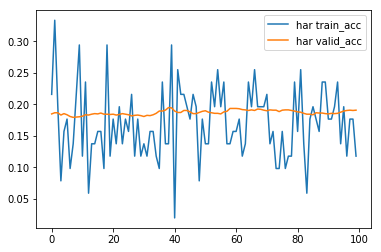

In [14]:
# import matplotlib.pyplot as mplot
mplot.plot(train_acc, label='har train_acc')
mplot.plot(valid_acc, label='har valid_acc')
mplot.legend()
mplot.show()

In [15]:
test_acc, test_loss = [], []

with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    ################## Test
    state = sess.run(cell.zero_state(batch_size, tf.float32))
    acc_batch = []
    loss_batch = []    
    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_ : x, labels_ : y, keep_prob_ : 1.0, initial_state : state}

        # Loss
        loss, state, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)
        acc_batch.append(acc)
        loss_batch.append(loss)

    # Store
    test_acc.append(np.mean(acc_batch))
    test_loss.append(np.mean(loss_batch))

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(test_loss)),
          "Test acc: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints/dcnn-lstm-har.ckpt
Test loss: 1.733549 Test acc: 0.251806
